In [1]:
#Lets import the necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the data
data = pd.read_csv(r'C:\Users\Shiva\Downloads\FSDS---srinu\MLprojects-main\MLprojects-main\Churn Modeling.csv')

In [3]:
# check the data
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
print(f'The data contains: \nTotal number of rows: {data.shape[0]} \nTotal number of columns: {data.shape[1]}')

The data contains: 
Total number of rows: 10000 
Total number of columns: 14


In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [8]:
data1 = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [9]:
data1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
print(f'The data contains: \nTotal of rows: {data1.shape[0]} \nTotal number of Columns: {data1.shape[1]}')

The data contains: 
Total of rows: 10000 
Total number of Columns: 11


In [11]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [12]:
cat_val = data1.columns.tolist()

In [13]:
#Check the features in the data
for column in cat_val:
    print(data[column].value_counts())
    print('*'*40)

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64
****************************************
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
****************************************
Male      5457
Female    4543
Name: Gender, dtype: int64
****************************************
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64
****************************************
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64
****************************************
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Na

# Exploratory Data Analysis (EDA)

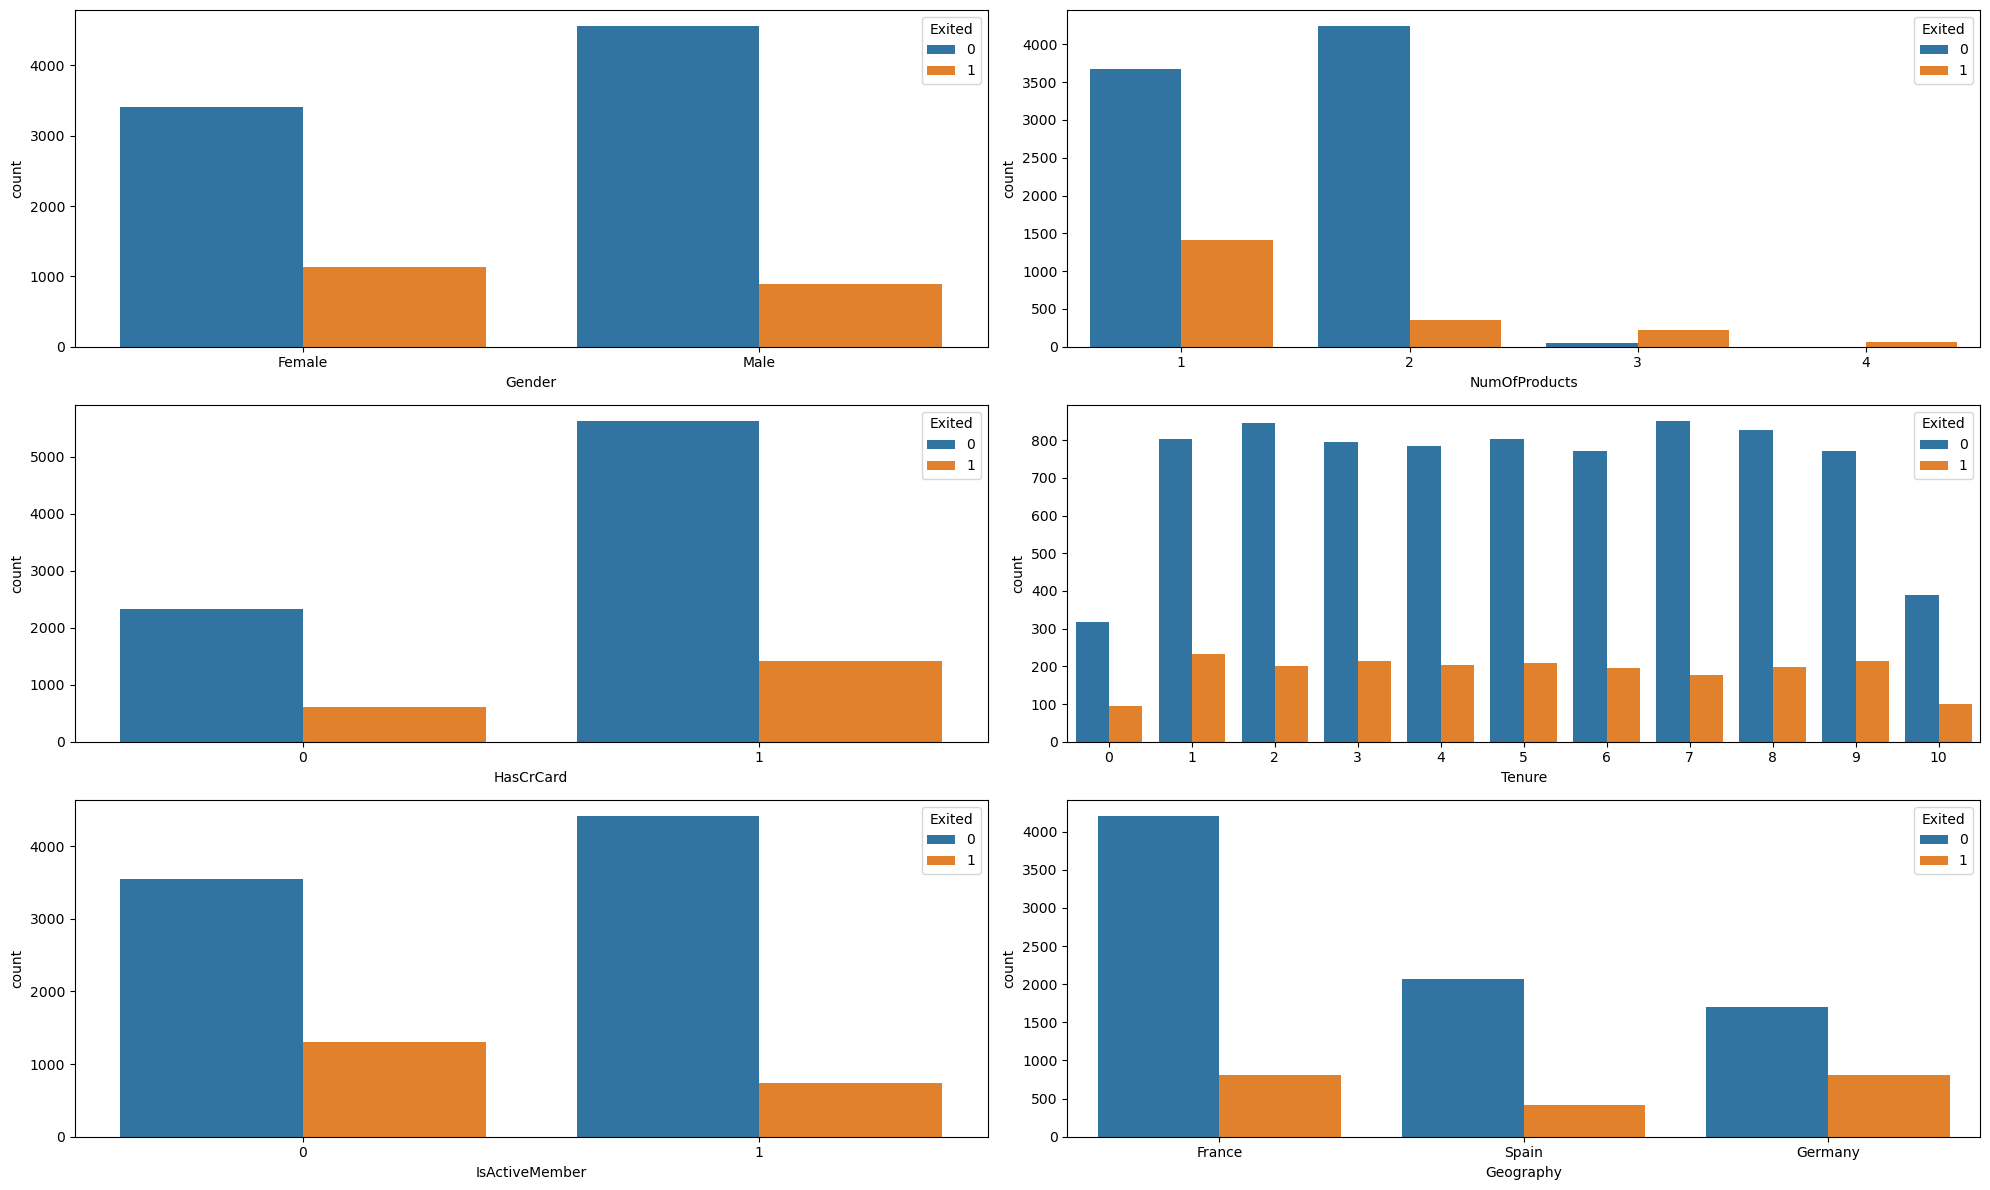

In [14]:
col_m = ['Gender','NumOfProducts','HasCrCard','Tenure','IsActiveMember','Geography']

fig,axs=plt.subplots(nrows=3,ncols=2,figsize=(20,12))
axs=axs.flatten()
for i,var in enumerate(col_m):
    sns.countplot(data=data1,x=var,hue='Exited',ax=axs[i])
plt.tight_layout()    
plt.show()    

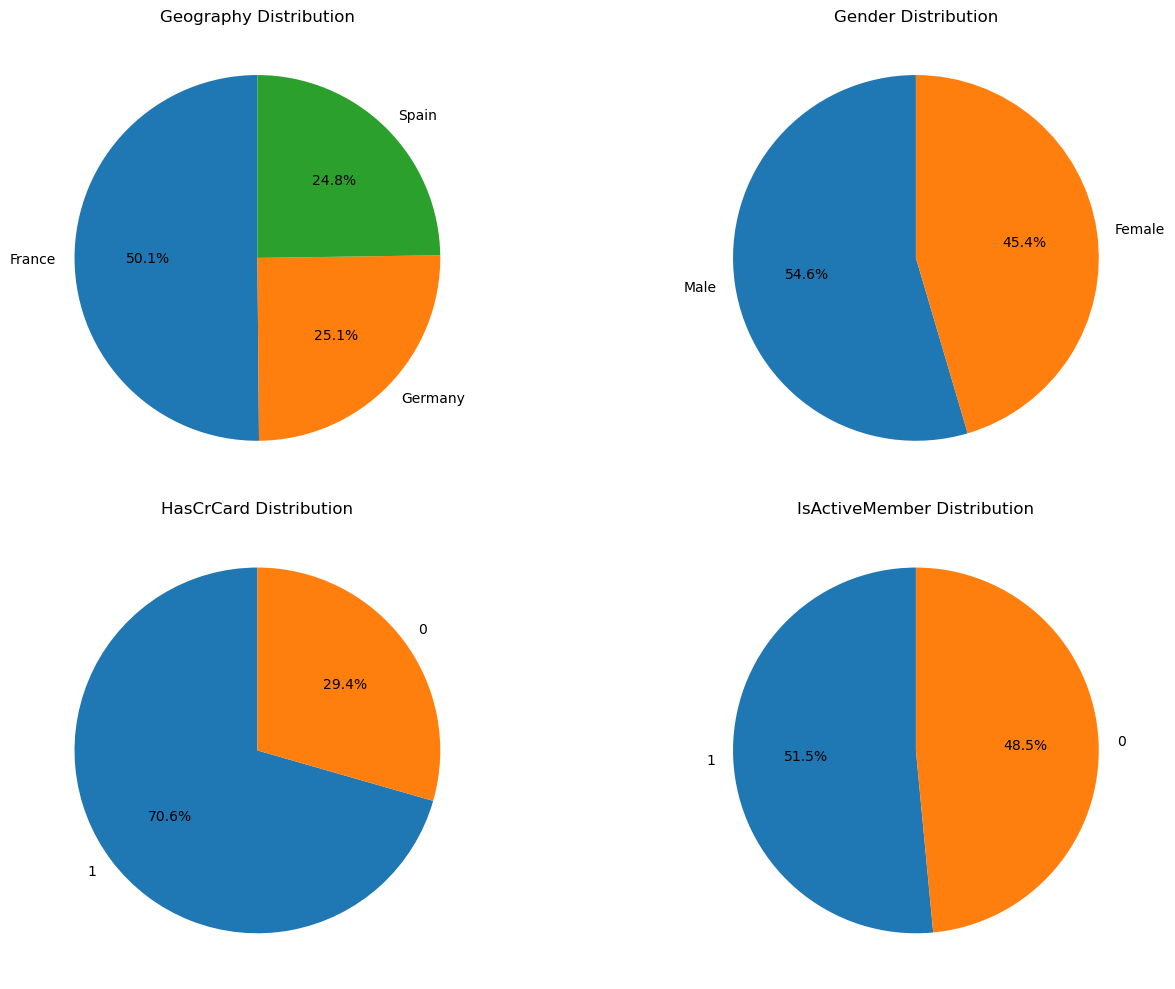

In [15]:
cat_obj=['Geography','Gender','HasCrCard','IsActiveMember']
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(15,10))

for i, var in enumerate(cat_obj):
    if i < len(axs.flat):
        obj_cont=data1[var].value_counts()
        axs.flat[i].pie(obj_cont,labels=obj_cont.index,autopct='%1.1f%%',startangle=90)
        axs.flat[i].set_title(f'{var} Distribution')
fig.tight_layout()
plt.show()

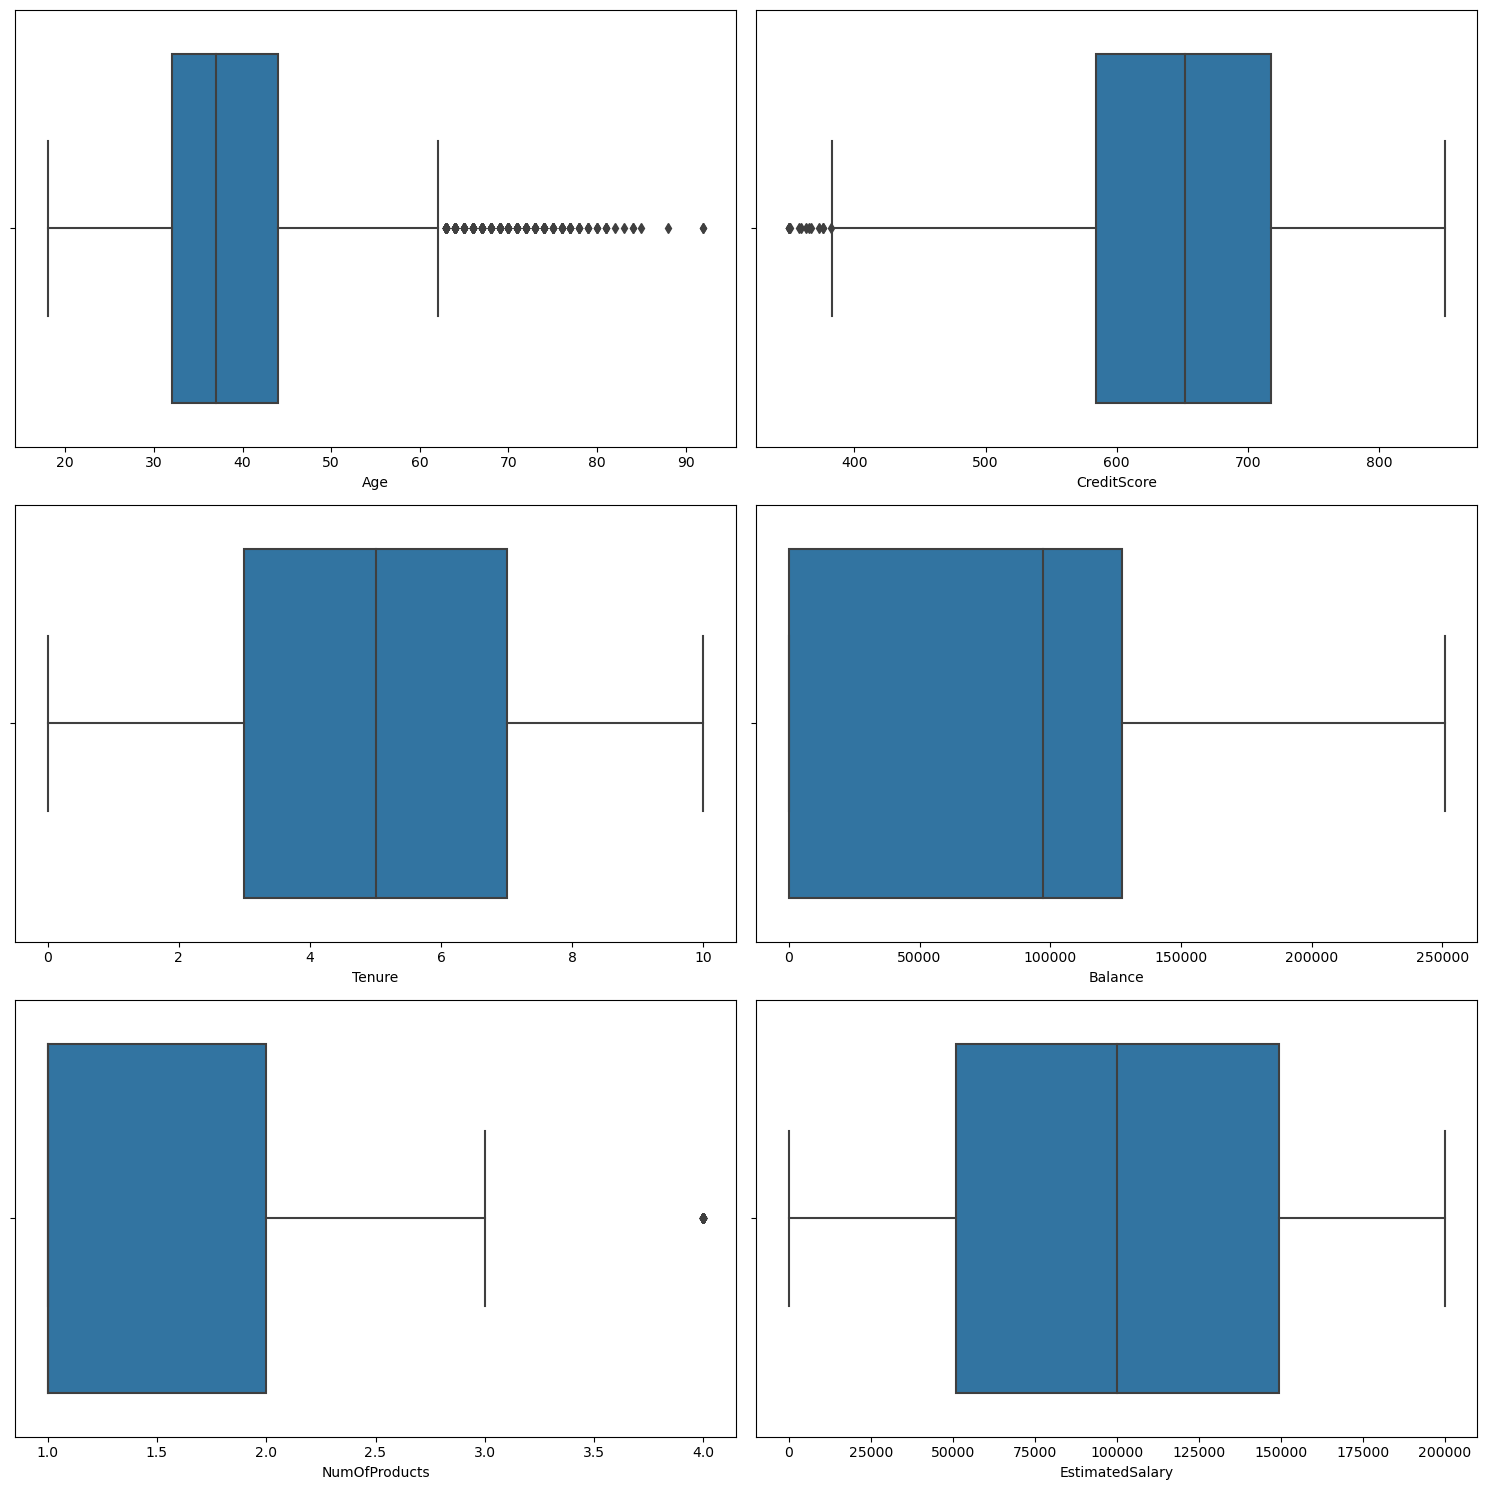

In [16]:
num = ['Age','CreditScore','Tenure','Balance','NumOfProducts','EstimatedSalary']

fig,axs=plt.subplots(nrows=3,ncols=2,figsize=(15,15))
axs=axs.flatten()

for i, var in enumerate(num):
    sns.boxplot(x=var,data=data1,ax=axs[i])
fig.tight_layout()
plt.show()

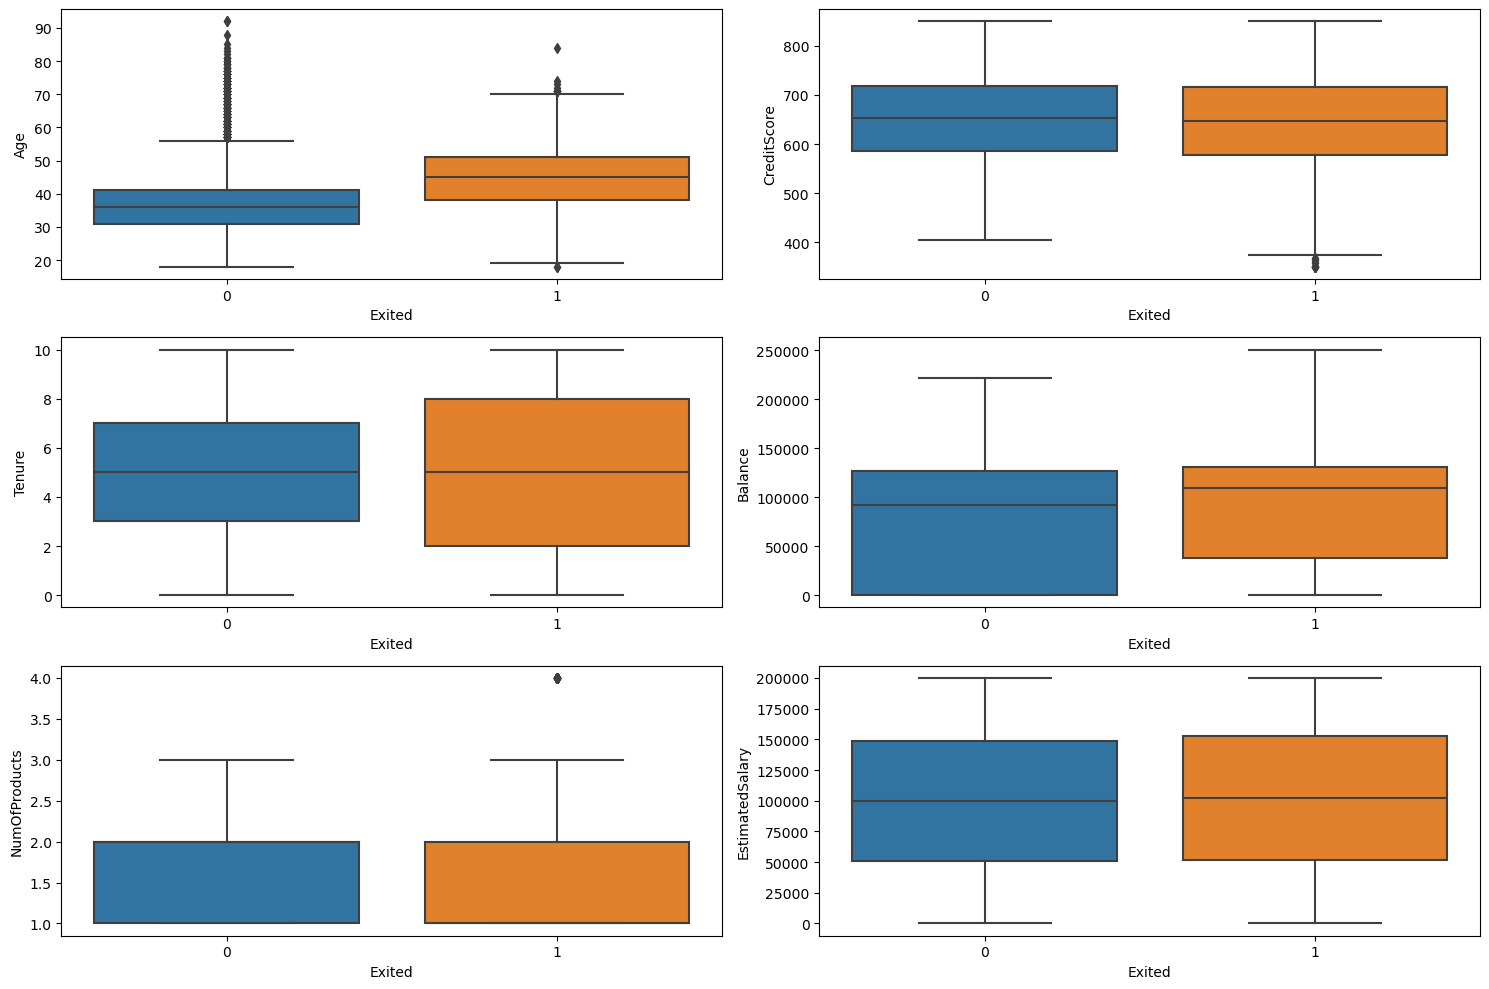

In [17]:
num_1=['Age','CreditScore','Tenure','Balance','NumOfProducts','EstimatedSalary']
fig,axs=plt.subplots(nrows=3,ncols=2,figsize=(15,10))
axs=axs.flatten()
for i, var in enumerate(num_1):
    sns.boxplot(y=var,x='Exited',data=data1,ax=axs[i])
fig.tight_layout()
plt.show()

In [18]:
data1.isnull().sum()*100/data1.shape[0]

CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [19]:
#label encoding
for col in data1.select_dtypes(include=['object']).columns:
    print(f'{col}:\n{data[col].unique()}')

Geography:
['France' 'Spain' 'Germany']
Gender:
['Female' 'Male']


In [20]:
for col in data1.select_dtypes(include=['object']).columns:
    
    label_encod=preprocessing.LabelEncoder()
    label_encod.fit(data1[col].unique())
    data1[col]=label_encod.transform(data1[col])
    print(f'{col}:\n{data1[col].unique()}')

Geography:
[0 2 1]
Gender:
[0 1]


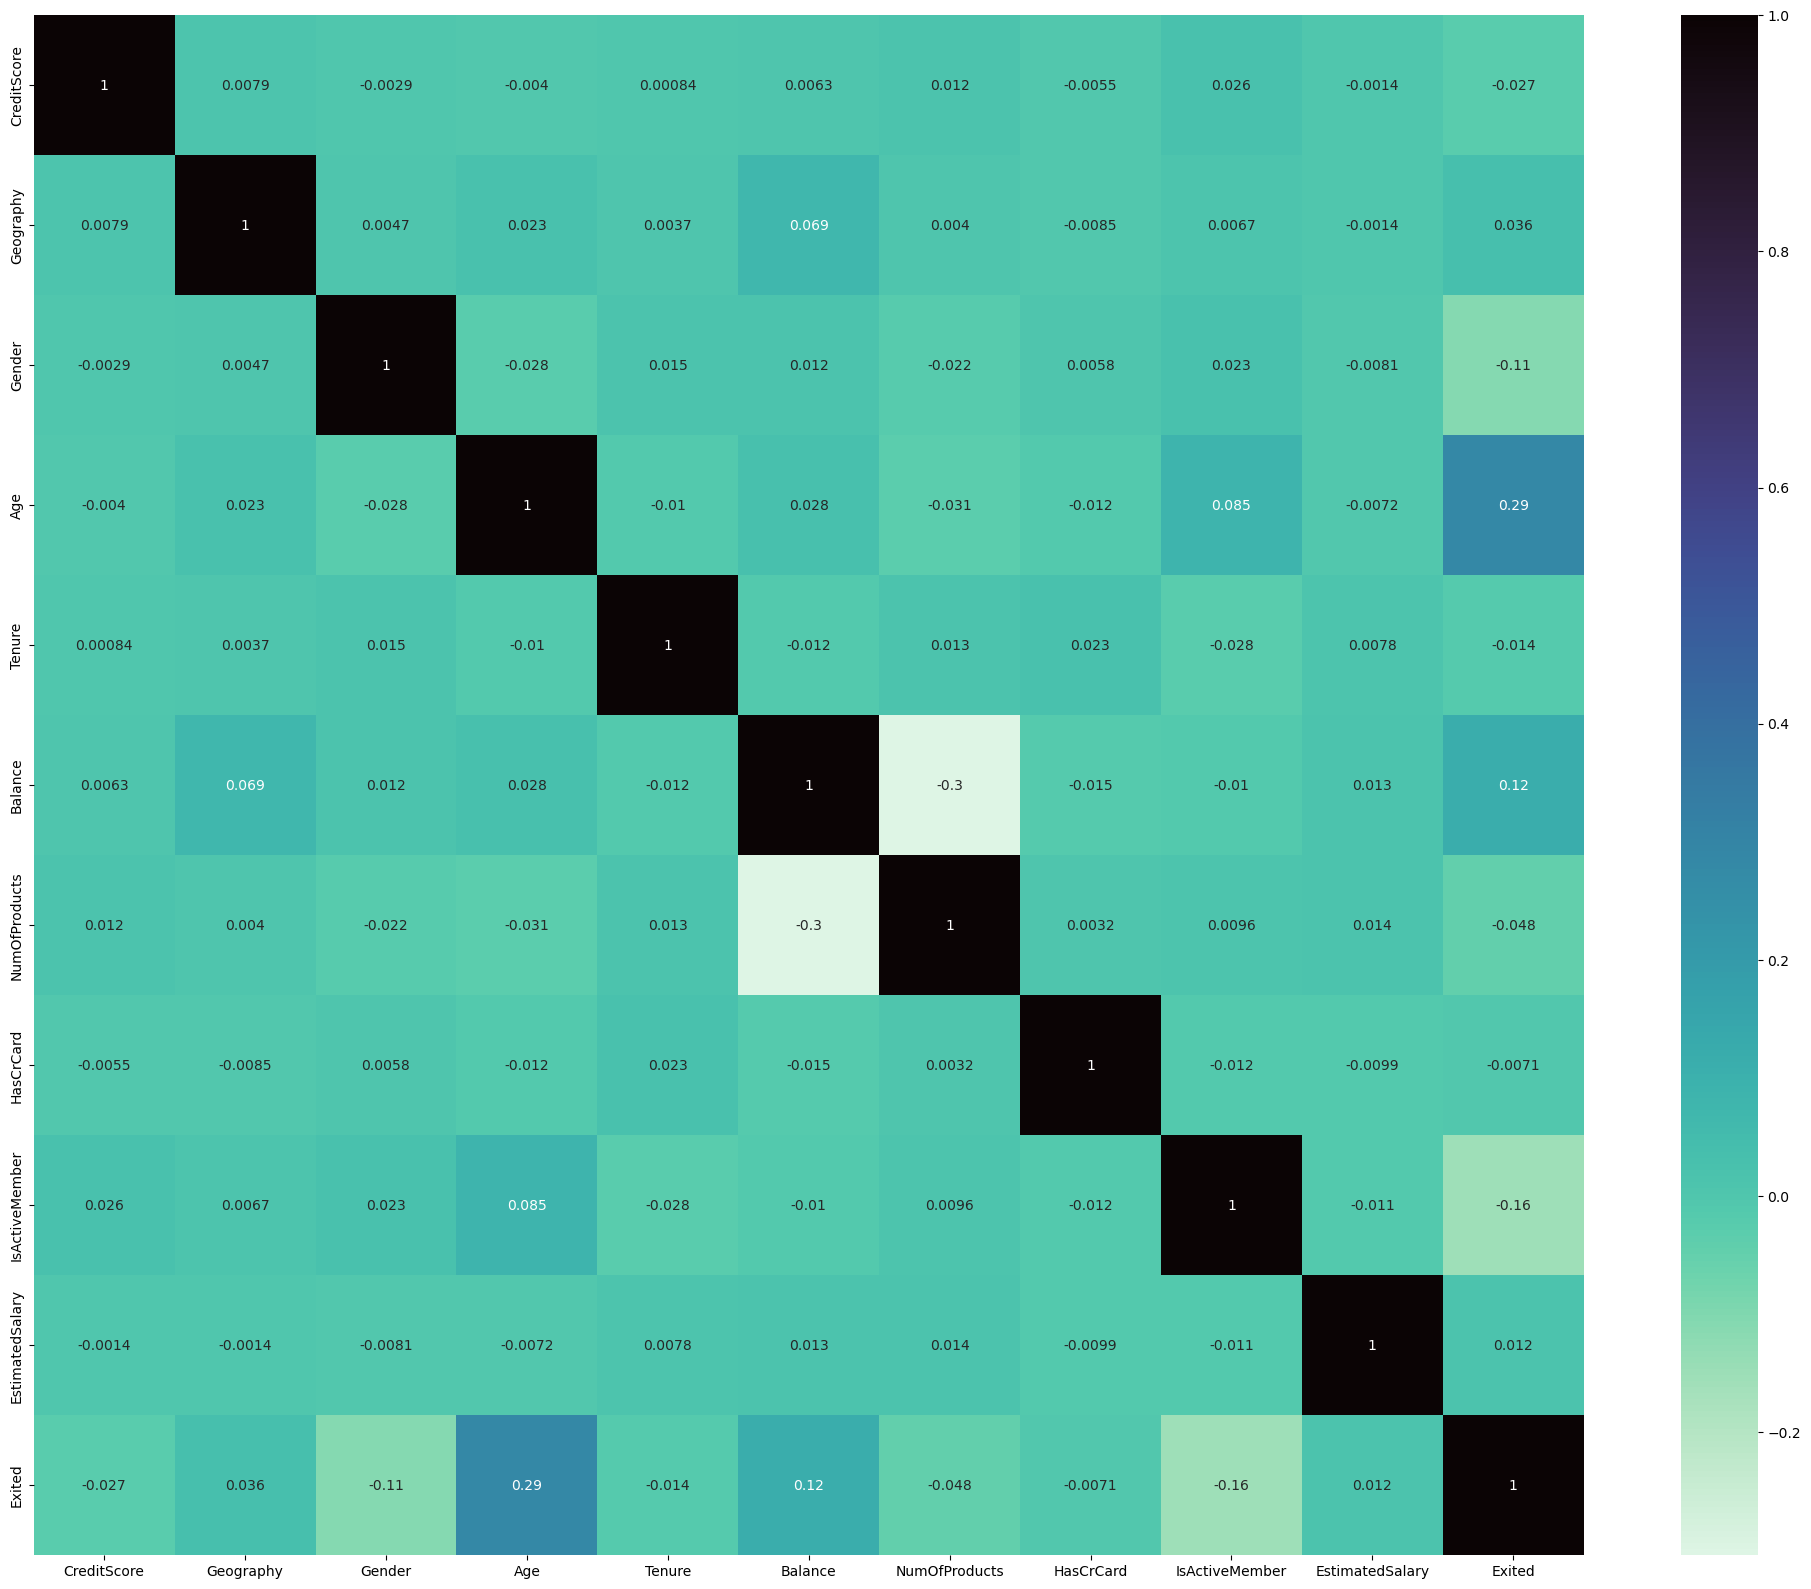

In [21]:
plt.figure(figsize=(25,20))
sns.heatmap(data1.corr(),cmap='mako_r',annot=True);

In [22]:
x=data1.drop(['Exited'],axis=1)
y=data1['Exited']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Outlier detection and remove

In [23]:
sele_colum=['Age','CreditScore','NumOfProducts']
z_score=np.abs(stats.zscore(x_train[sele_colum]))
threshold=3
outlier_inde=np.where(z_score > threshold)[0]
X_train=x_train.drop(x_train.index[outlier_inde])
Y_train=y_train.drop(y_train.index[outlier_inde])

# Train The model with Decision Tree

In [24]:
decision_tree=DecisionTreeClassifier(class_weight='balanced')
param_grid={
    'max_depth':[3,4,5,6,7,8],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2,3,4],
    'random_state':[0,42]
}
grid_search=GridSearchCV(decision_tree,param_grid,cv=5)
grid_search.fit(X_train,Y_train)
print(grid_search.best_params_)

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [25]:
dtree=DecisionTreeClassifier(random_state=0,max_depth=3,min_samples_leaf=1,min_samples_split=2)
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [26]:
from sklearn.metrics import accuracy_score
y_pred=dtree.predict(x_test)
print(f'Accuracy_score: {round(accuracy_score(y_test,y_pred)*100,2)}%')

Accuracy_score: 84.25%


# Checking the Accuracy and validation

In [27]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,log_loss
print('F1 Score :',(f1_score(y_test,y_pred,average='micro')))
print('Precision Score: ',(precision_score(y_test,y_pred,average='micro')))
print('Recall_score',(recall_score(y_test,y_pred,average='micro')))
print('Log Los :',(log_loss(y_test,y_pred)))

F1 Score : 0.8425
Precision Score:  0.8425
Recall_score 0.8425
Log Los : 5.676875408785952


In [28]:
im_df=pd.DataFrame({'Feature Names':X_train.columns, 'importance':dtree.feature_importances_})
fe=im_df.sort_values(by='importance',ascending=False)

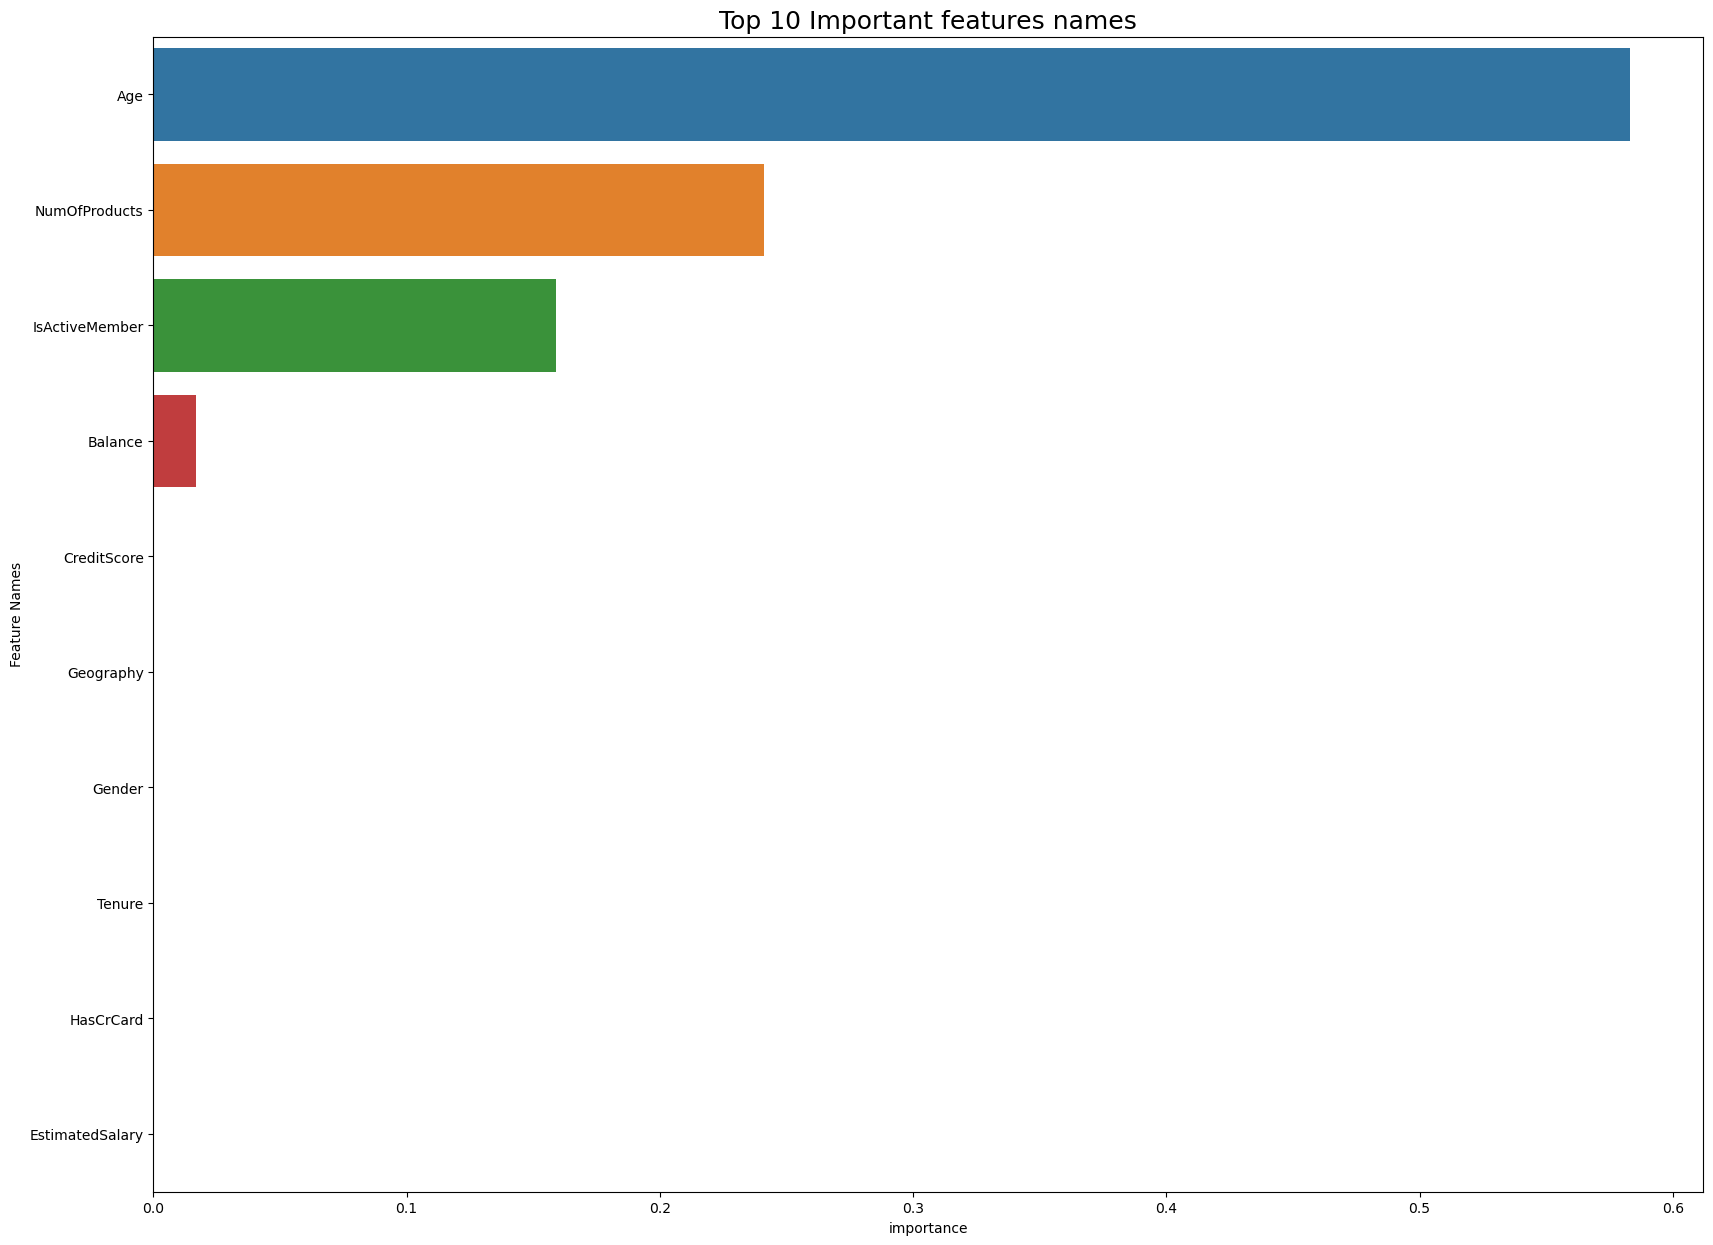

In [29]:
fe1=fe.head(10)
plt.figure(figsize=(20,15))
sns.barplot(data=fe1,x='importance',y='Feature Names')
plt.title('Top 10 Important features names',fontsize=18)
plt.show()

# Feature importance explainer with SHAP

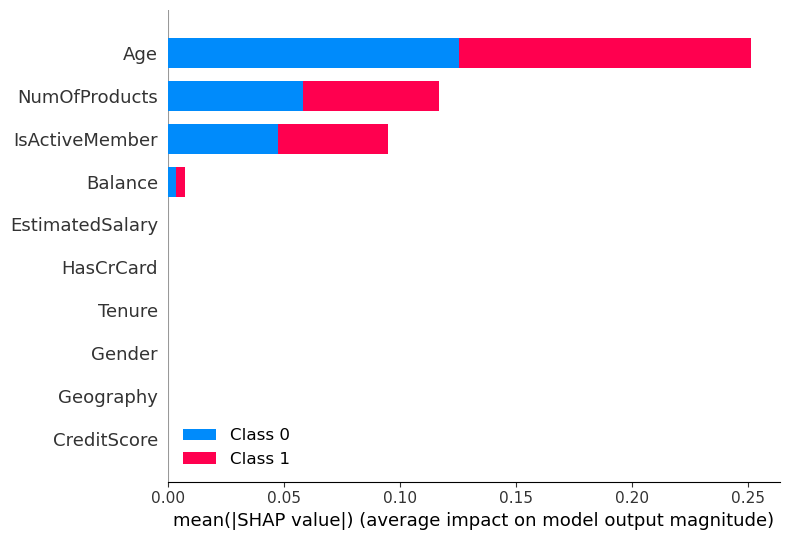

In [30]:
import shap
explainer=shap.TreeExplainer(dtree)
shap_values=explainer.shap_values(x_test)
shap.summary_plot(shap_values,x_test)

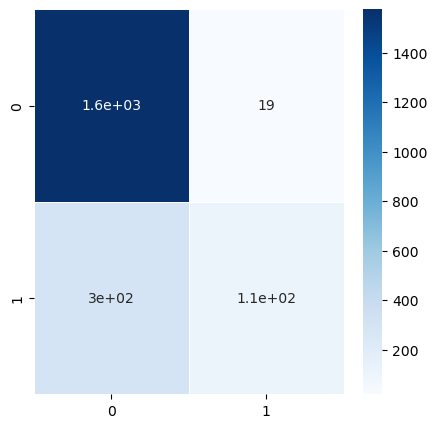

In [31]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,annot=True,cmap="Blues",linewidths=0.5)
plt.show()

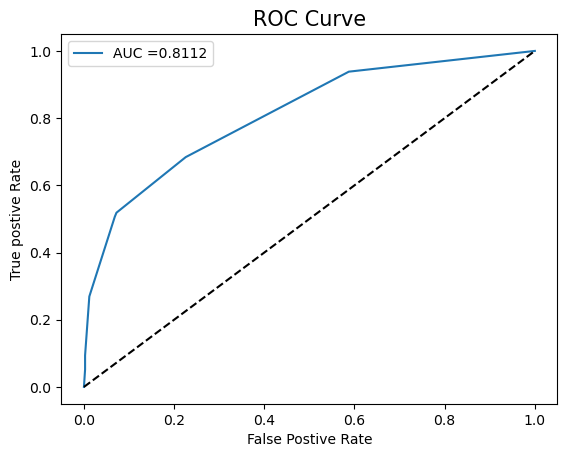

In [32]:
y_pred_prob=dtree.predict_proba(x_test)[:][:,1]
df_actual_predicted=pd.concat([pd.DataFrame(np.array(y_test),columns=['y_actual']),
                            pd.DataFrame(y_pred_prob,columns=['y_pred_prob'])],axis=1)
df_actual_predicted.index=y_test.index
fqr,tqr,tr=roc_curve(df_actual_predicted['y_actual'],df_actual_predicted['y_pred_prob'])
auc=roc_auc_score(df_actual_predicted['y_actual'],df_actual_predicted['y_pred_prob'])
plt.plot(fqr,tqr,label='AUC =%0.4f' %auc)
plt.plot(fqr,fqr,linestyle='--',color='k')
plt.xlabel('False Postive Rate')
plt.ylabel('True postive Rate')
plt.title('ROC Curve',size=15)
plt.legend()

# Random Forest Calssifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(class_weight='balanced')
param_grid={
    'n_estimators':[100, 200],
    'max_depth':[None, 5, 10],
    'max_features':['sqrt'],
    'random_state':[0, 42]
}

grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100, 'random_state': 0}


In [34]:
rfc = RandomForestClassifier(random_state=0,max_features='sqrt',n_estimators=100,class_weight='balanced')
rfc.fit(X_train,Y_train)

RandomForestClassifier(class_weight='balanced', random_state=0)

In [35]:
y_pred_1=rfc.predict(x_test)
print('Accuracy_score :', round(accuracy_score(y_test,y_pred_1)*100,2),'%')

Accuracy_score : 86.4 %


In [36]:
print('F1 Score :',(f1_score(y_test,y_pred_1,average='micro')))
print('Precision Score:',(precision_score(y_test,y_pred_1,average='micro')))
print('Recall_score:',(recall_score(y_test,y_pred_1,average='micro')))
print('Log Los :',(log_loss(y_test,y_pred_1)))

F1 Score : 0.864
Precision Score: 0.864
Recall_score: 0.864
Log Los : 4.901936860919933


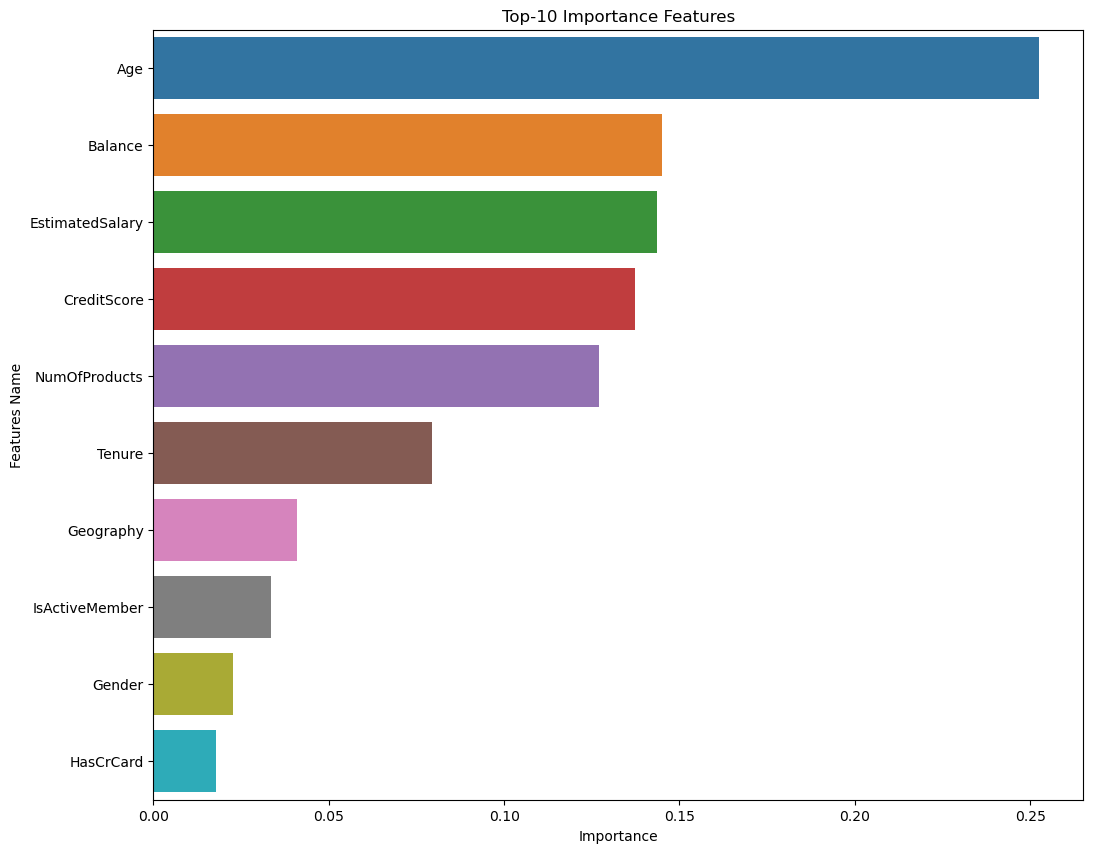

In [37]:
im_fea=pd.DataFrame({
    'Features Name':X_train.columns,
    'Importance':rfc.feature_importances_
})
fim=im_fea.sort_values(by='Importance',ascending=False)

fim2=fim.head(10)
plt.figure(figsize=(12,10))
sns.barplot(data=fim2,x='Importance',y='Features Name')
plt.title('Top-10 Importance Features')
plt.xlabel('Importance')
plt.ylabel('Features Name')
plt.show()

<Axes: >

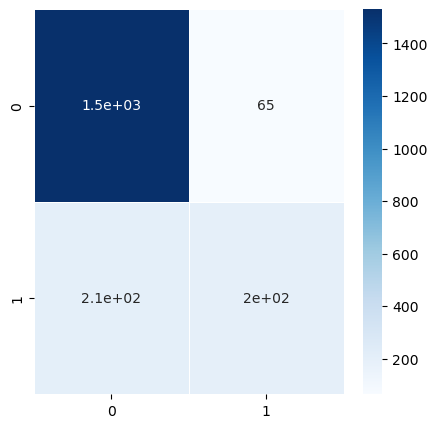

In [38]:
cm = confusion_matrix(y_test,y_pred_1)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,annot=True,cmap='Blues',linewidths=0.5)

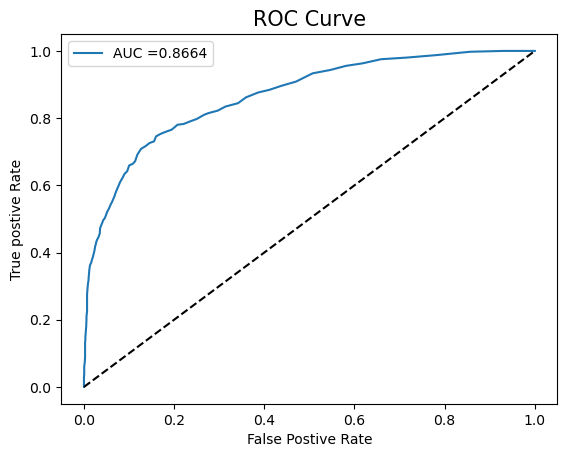

In [39]:
y_pred_prob=rfc.predict_proba(x_test)[:][:,1]
df_actual_predicted=pd.concat([pd.DataFrame(np.array(y_test),columns=['y_actual']),
                              pd.DataFrame(y_pred_prob,columns=['y_pred_prob'])],axis=1)
df_actual_predicted.index=y_test.index
fqr,tqr,tr=roc_curve(df_actual_predicted['y_actual'],df_actual_predicted['y_pred_prob'])
auc=roc_auc_score(df_actual_predicted['y_actual'],df_actual_predicted['y_pred_prob'])

plt.plot(fqr,tqr,label='AUC =%0.4f' %auc)
plt.plot(fqr,fqr,linestyle='--',color='k')
plt.xlabel('False Postive Rate')
plt.ylabel('True postive Rate')
plt.title('ROC Curve',size=15)
plt.legend()

# Lets do some statical analysis on the parameters

# Chi_square test for categorical features

In [40]:
#First will do the chi_square test on the categorical values
#Select the categorical columns from the data
cat_col=data.select_dtypes(include='object').columns
cat_col1=['Geography', 'Gender']

In [41]:
#lets import the library for coluring the text and stats
import colorama
from colorama import Fore
from scipy.stats import chi2_contingency
import stat

Geography:


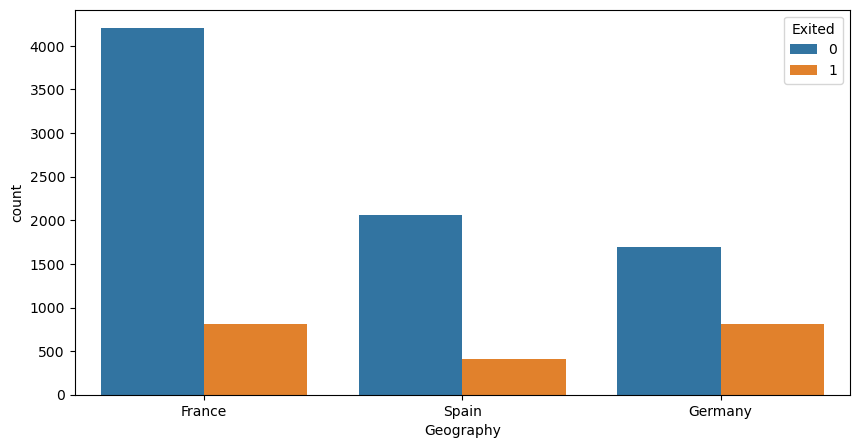

'Geography' is a 'Good Predictor'
p_val=3.830317605354266e-66

Gender:


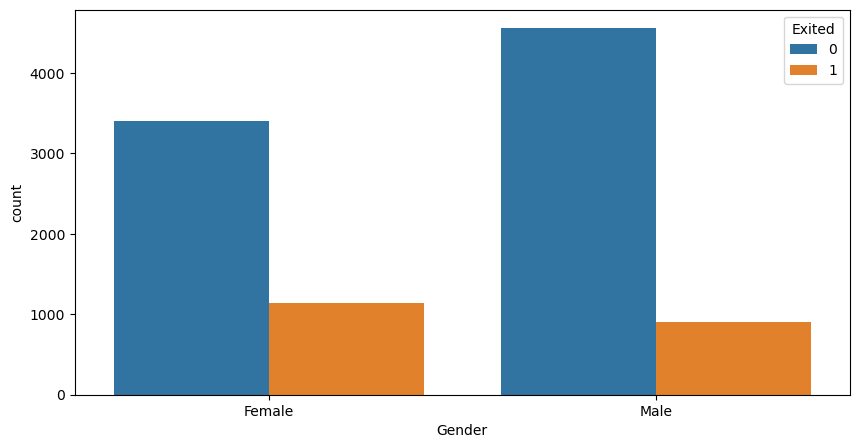

'Gender' is a 'Good Predictor'
p_val=1.7204149874840846e-26



In [44]:
for i in cat_col1:
    print(i + ':')
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, hue='Exited', x=i)
    plt.show()
    a = np.array(pd.crosstab(data.Exited, data[i]))
    (stats, p, dof,_) = chi2_contingency(a, correction=False)
    if p > 0.05:
        print(Fore.RED + "'{}' is a 'bad Predictor'".format(i))
        print('p_val={}\n'.format(p))
    else:
        print(Fore.GREEN + "'{}' is a 'Good Predictor'".format(i))
        print('p_val={}\n'.format(p))

From the above analysis both the categorical features are good predictor, same we have used both features for prediction.

# Anova Test for continous features

In [45]:
#Lets import the necessary stats library
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
import statsmodels.api as smf

In [46]:
#select the continous features
cont_f=data.select_dtypes(exclude='object').columns
cont_f

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [47]:
#lets take only necessary columns
cont_f=['CreditScore','Age','Tenure','Balance',
       'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']

In [52]:
for i in cont_f:
    print('-----------------------------------------------------------------------------')
    print(i+':\n')
    print('ANNOVA:\n')
    mod=ols(i+'~Exited',data=data).fit()
    aov_table=smf.stats.anova_lm(mod,type = 2)
    print(aov_table,'\n')
    print('Pvalue={}\n'.format(aov_table['PR(>F)'][0]))
    p=aov_table['PR(>F)'][0]
    
    if p>0.05:
        print(Fore.RED +"'{}' is a 'bad Predictor'\n".format(i))
        print('Avg of this feature is same for both card approved group and not approved group\n')
    else:
        print('TUKEY:\n')
        print(Fore.RED +"'{}' is a 'good Predictor'\n".format(i))
        print('Avg of this feature is same for both card approved group and not approved group\n')
        print('we need to perform Tuckey as atleast one category is different\n')
        print(Fore.GREEN +"'{}' is a 'good Predictor'\n".format(i))
        tuckey=pairwise_tukeyhsd(data[i],data.Exited,alpha=0.05)
        print(tuckey,'\n')

-----------------------------------------------------------------------------
CreditScore:

ANNOVA:

              df        sum_sq       mean_sq         F    PR(>F)
Exited       1.0  6.856799e+04  68567.991506  7.344522  0.006738
Residual  9998.0  9.334069e+07   9335.936359       NaN       NaN 

Pvalue=0.006738213892205324

TUKEY:

'CreditScore' is a 'good Predictor'

Avg of this feature is same for both card approved group and not approved group

we need to perform Tuckey as atleast one category is different

'CreditScore' is a 'good Predictor'

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -6.5017 0.0067 -11.2044 -1.799   True
---------------------------------------------------- 

-----------------------------------------------------------------------------
Age:

ANNOVA:

              df        sum_sq       mean_sq           F         PR(>F)
Exited       1

From the above anova test there were three bad predictor identified 1)Tenure 2)Has card 3)Estimated Salary